In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp

%matplotlib inline

import quandl

In [4]:
df = quandl.get("USTREASURY/YIELD")

In [5]:
df.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [6]:
df.count()

1 MO     4572
2 MO      267
3 MO     7468
6 MO     7471
1 YR     7471
2 YR     7471
3 YR     7471
5 YR     7471
7 YR     7471
10 YR    7471
20 YR    6532
30 YR    6477
dtype: int64

In [7]:
df = df.drop(["2 MO"],  axis =1)

In [8]:
df = df.drop(["1 MO"], axis = 1 )

In [9]:
df.count()

3 MO     7468
6 MO     7471
1 YR     7471
2 YR     7471
3 YR     7471
5 YR     7471
7 YR     7471
10 YR    7471
20 YR    6532
30 YR    6477
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.count()

3 MO     5535
6 MO     5535
1 YR     5535
2 YR     5535
3 YR     5535
5 YR     5535
7 YR     5535
10 YR    5535
20 YR    5535
30 YR    5535
dtype: int64

In [12]:
df.head()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,
1993-10-01,2.98,3.11,3.35,3.84,4.18,4.72,5.03,5.34,6.12,5.98
1993-10-04,3.02,3.17,3.35,3.85,4.16,4.71,5.04,5.34,6.10,5.99
1993-10-05,3.06,3.20,3.38,3.86,4.18,4.72,5.05,5.35,6.12,6.01
1993-10-06,3.04,3.19,3.36,3.85,4.16,4.70,5.05,5.35,6.12,6.01
1993-10-07,3.05,3.17,3.35,3.83,4.15,4.69,5.05,5.33,6.11,6.01


In [15]:
df.head()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,
1993-10-01,2.98,3.11,3.35,3.84,4.18,4.72,5.03,5.34,6.12,5.98
1993-10-04,3.02,3.17,3.35,3.85,4.16,4.71,5.04,5.34,6.10,5.99
1993-10-05,3.06,3.20,3.38,3.86,4.18,4.72,5.05,5.35,6.12,6.01
1993-10-06,3.04,3.19,3.36,3.85,4.16,4.70,5.05,5.35,6.12,6.01
1993-10-07,3.05,3.17,3.35,3.83,4.15,4.69,5.05,5.33,6.11,6.01


In [16]:
def lambda_selection(t):
    lamb_mat = np.arange( 1.0, 20.5, 0.5)
    lamb_mat = lamb_mat.T
    lamb = np.argmax( (1 - np.exp( -t * lamb_mat) /(t * lamb_mat)) - (np.exp( -t * lamb_mat)) )
    
    return lamb

In [17]:
import math

def constants(lamb, t):
    c1 = 1
    c2 = (1 - exp(-t * lamb))/(t * lamb)
    c3 = (1 - exp(-t * lamb))/(t * lamb) - exp(-t * lamb)
    
    return c1,c2,c3

In [18]:
lamb = lambda_selection(2)
a2,b2,c2 = constants(lamb,2)

In [19]:
lamb = lambda_selection(10)
a10,b10,c10 = constants(lamb,10)

In [20]:
lamb = lambda_selection(20)
a20,b20,c20 = constants(lamb,20)

In [52]:
def parameters(a2,b2,c2,a10,b10,c10,a20,b20,c20):
    for i in range(len(df)):
        k1 = df['2 YR'].iloc[i]
        k2 = df['10 YR'].iloc[i]
        k3 = df['20 YR'].iloc[i]
        
        A = np.array([(a2,b2,c2),(a10,b10,c10),(a20,b20,c20)])
        b= np.array([k1,k2,k3])
        beta = np.linalg.solve(A,b)

        df['beta_0'].iloc[i] = beta[0] 
        df['beta_1'].iloc[i] = beta[1]
        df['beta_2'].iloc[i] = beta[2]

In [53]:
df.head()

,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR,beta_0,beta_1,beta_2
Date,,,,,,,,,,,,,
1993-10-01,2.98,3.11,3.35,3.84,4.18,4.72,5.03,5.34,6.12,5.98,-2.826667,-1.072217e+18,1.072217e+18
1993-10-04,3.02,3.17,3.35,3.85,4.16,4.71,5.04,5.34,6.10,5.99,-5.268889,-1.069335e+18,1.069335e+18
1993-10-05,3.06,3.20,3.38,3.86,4.18,4.72,5.05,5.35,6.12,6.01,-3.933333,-1.066452e+18,1.066452e+18
1993-10-06,3.04,3.19,3.36,3.85,4.16,4.70,5.05,5.35,6.12,6.01,-5.051111,-1.075099e+18,1.075099e+18
1993-10-07,3.05,3.17,3.35,3.83,4.15,4.69,5.05,5.33,6.11,6.01,-2.826667,-1.072217e+18,1.072217e+18


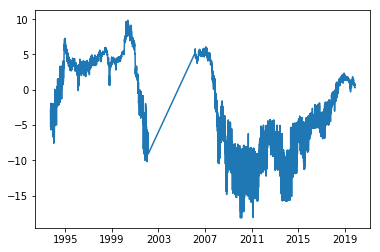

<Figure size 720x432 with 0 Axes>

In [59]:
plt.plot(df['beta_0'])
plt.figure(figsize = (10,6))
plt.show()